Group 12

Anakha Krishnavilasom Gopalakrishnan -  20 hours

Daniel Juster - 20 hours

# **Assignment 3 - Clustering**

**Bakground/Introduction**

These questions concern the main conformation of proteins. Part of a protein's main chain is
shown in Figure 1. A protein chain is able to fold into its native conformation by rotation
around two of the bonds in the main chain, designated φ (phi) and ψ (psi). Some
combinations of phi and psi values are impossible (e.g. some atoms clash into each other if
we try to force the main chain to have a particular combination of phi and psi values). Some
other combinations of phi and psi values are very common since they are energetically
favourable. To understand the problem domain better, please look at:

To understand the problem domain better, please look at:
http://bioinformatics.org/molvis/phipsi/

http://tinyurl.com/RamachandranPrincipleYouTube

The data file “data_assignment3.csv” contains a list of phi and psi combinations that have
been observed in a large set of proteins. The angles are measured here in degrees.
[Figure]


Figure 1. A protein's main chain. The heavy (i.e. non-hydrogen) main chain atoms of three consecutive amino acid residues
(i-1, I and i+1) are represented by spheres, and the covalent bonds between these atoms are represented by rods. Nitrogen
and oxygen atoms (N and O) are shown in blue and red respectively; carbon atoms are shown in grey. The central carbon
atom (the alpha carbon, or Cα, labelled CA) is the main chain atom to which a side chain (not shown) is attached. Rotation
can occur around the bonds labelled φ (phi) and ψ (psi).




# **1**

Show the distribution of phi and psi combinations using:

a. A scatter plot

b. A 2D histogram

c.
The top edge of a Ramachandran plot wraps round to the bottom edge, and
the right edge wraps around to the left edge (we can think of the 2D
Ramachandran plot being mapped onto the surface of a torus). Ideally, this
should be considered when clustering the data points on a Ramachandran
plot. Can you transform the data, taking this into consideration, for better
visualisation? Use your transformed data for questions 2-4.

**Answer 1a** - A scatter plot of distribution of phi and psi combinations

In [201]:
# Importing librarties and the data 
# ---------------------------------

# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


# Connect to drive where we have the data-csv
from google.colab import drive
drive.mount('/content/drive')

# Importing the data
PROTEIN = pd.read_csv("/content/drive/MyDrive/test/data_assignment3.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
# Get some information about the data
PROTEIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29369 entries, 0 to 29368
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   residue name  29369 non-null  object 
 1   position      29369 non-null  int64  
 2   chain         29369 non-null  object 
 3   phi           29369 non-null  float64
 4   psi           29369 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [203]:
# Get a description of the data
PROTEIN.describe()

,position,phi,psi
count,29369.000000,29369.000000,29369.000000
mean,182.917634,-82.362440,64.251961
std,130.180669,56.848421,91.119597
min,1.000000,-179.991175,-179.995255
25%,84.000000,-118.089883,-24.299401
50%,151.000000,-85.198070,110.903019
75%,257.000000,-63.287290,141.154709
max,772.000000,179.973856,179.986259


In [204]:
PROTEIN.head(5)

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


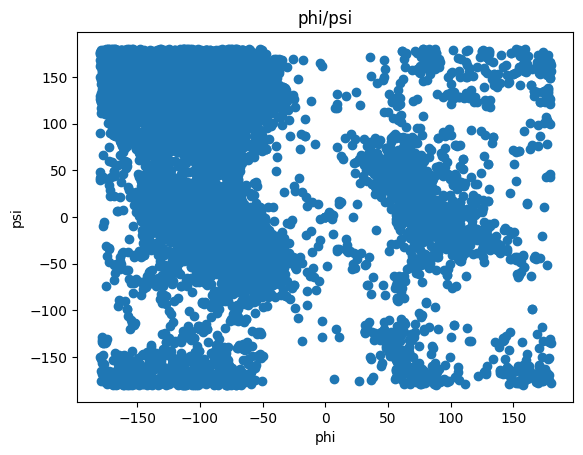

In [205]:
# Time to scatter
# Adding some labels and a title to the graph
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('phi/psi')


# Now, time to scatter to test how it looks like
plt.scatter(PROTEIN['phi'], PROTEIN['psi'])

**Answer 1b** -  A 2D histogram of distribution of phi and psi combinations

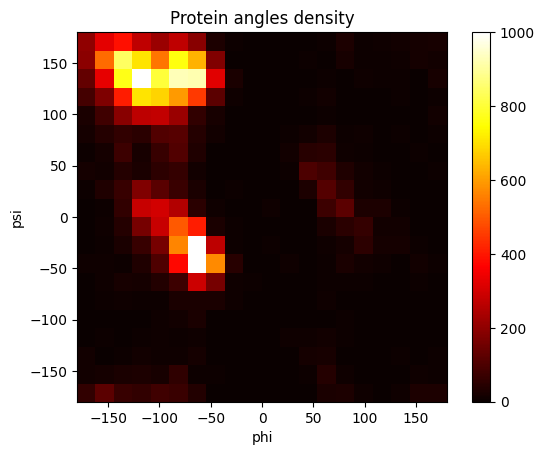

In [206]:
# Using numpy(np) to create a 2d histogram from phi and psi. We use 20 bins making the result a bit squary, but still visible.
PROTEIN_2DHist, xx, yy=np.histogram2d(PROTEIN['phi'], PROTEIN['psi'], bins=(20,20))
extent=[xx[0], xx[-1], yy[0],yy[-1]]

# Setting some labels
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Protein angles density')

# Plotting 
plt.imshow(PROTEIN_2DHist.T, extent=extent, origin='lower', cmap='hot',vmin=0, vmax=1000)
plt.colorbar()




Based on the histogram, it looks like we have 3 clusters. 2 strong ones, and one to the right rather dark.

**Question 1c**

The top edge of a Ramachandran plot wraps round to the bottom edge, and
the right edge wraps around to the left edge (we can think of the 2D
Ramachandran plot being mapped onto the surface of a torus). Ideally, this
should be considered when clustering the data points on a Ramachandran
plot. Can you transform the data, taking this into consideration, for better
visualisation? Use your transformed data for questions 2-4.

**Answer 1c**


The data we have when plotted, shows that some datapoints have been "cut" in the meaning of being "above" 180, this appearing as -179. So if we try to shift the data set we might get cleaner clusters. Looking at the scatter-plott, we think that -120 (shifting 60) degrees for psi looks interesting, and shifting 180 degrees for phi might do the trick.

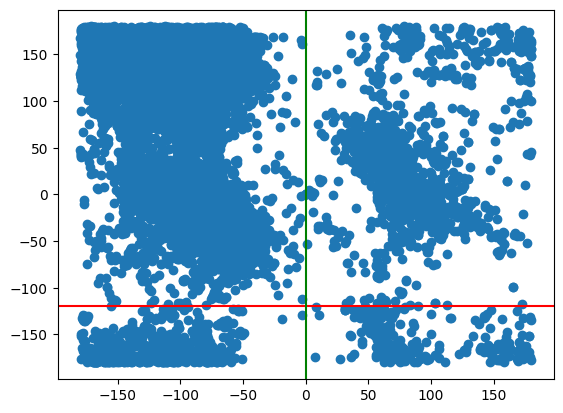

In [207]:
# Let's illustraste this

plt.scatter(PROTEIN['phi'], PROTEIN['psi'])

# Add a horizontal line at y=0
plt.axhline(y=-120, color='red')

# Add a vertical line at x=0
plt.axvline(x=0, color='green')

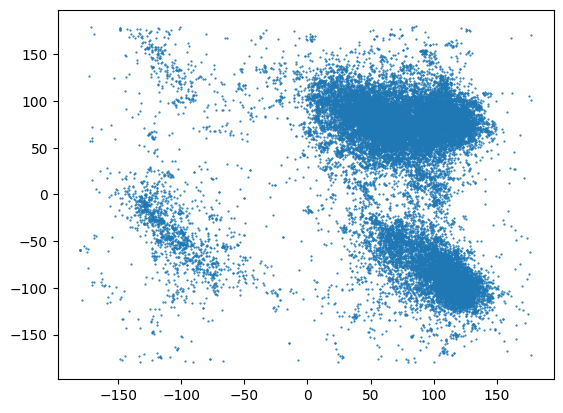

   phi_shifted_deg  psi_shifted_deg
0        30.687145        82.657714
1       135.716790        76.002076
2        60.027379       131.294737
3        44.682788        77.143523
4        75.148533        35.928520
  residue name  position chain         phi         psi
0          LYS        10     A -149.312855  142.657714
1          PRO        11     A  -44.283210  136.002076
2          LYS        12     A -119.972621 -168.705263
3          LEU        13     A -135.317212  137.143523
4          LEU        14     A -104.851467   95.928520


In [208]:
# It is rather straight forward to shift but we need to use rad to make sure that we do not exceed 180.

# Convert degrees to radians
phi_rad = np.radians(PROTEIN['phi'])
psi_rad = np.radians(PROTEIN['psi'])


# Shift the data in radians
phi_shifted = phi_rad + np.radians(180)
psi_shifted = psi_rad + np.radians(-60)

# Wrap the shifted values within the range of -180 to 180 degrees
phi_shifted = (phi_shifted + np.pi) % (2 * np.pi) - np.pi
psi_shifted = (psi_shifted + np.pi) % (2 * np.pi) - np.pi

# Convert back to degrees
phi_shifted_deg = np.degrees(phi_shifted)
psi_shifted_deg = np.degrees(psi_shifted)

# Create a scatter plot with the shifted data
plt.scatter(phi_shifted_deg, psi_shifted_deg, s = 0.3)

# Show the plot
plt.show()


# Create a new DataFrame with the shifted data
PROTEIN_shifted = pd.DataFrame({'phi_shifted_deg': phi_shifted_deg, 'psi_shifted_deg': psi_shifted_deg})

# Show the head of the new dataset
print(PROTEIN_shifted.head())
print(PROTEIN.head())

This looks really good.

# **2**
Use the K-means clustering method to cluster the phi and psi angle combinations in
the data file.




**2a.** Use an appropriate method to evaluate which value of K that gives the best clustering.


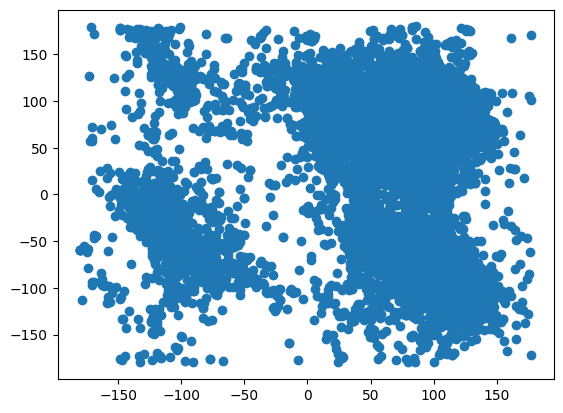

In [209]:
# Code 2a

# OK, so we have the data and have plotted it already:
plt.scatter(PROTEIN_shifted['phi_shifted_deg'], PROTEIN_shifted['psi_shifted_deg'])

#plt.scatter(phi_shifted_deg, psi_shifted_deg, s = 0.3)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


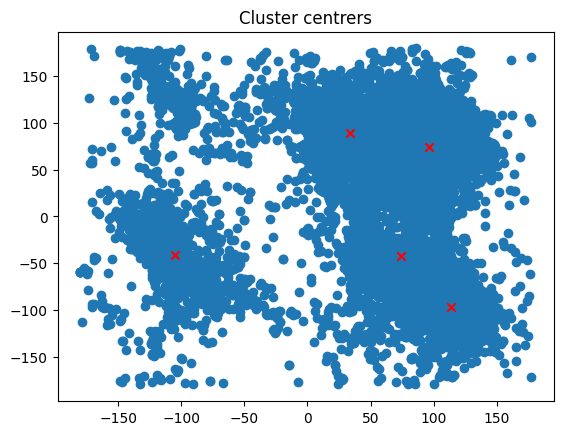

In [210]:
# Now we need help in doing the calculations, so import KMeans


# Format the data so we only have phi and psi
PROTEIN_X=PROTEIN_shifted[['phi_shifted_deg','psi_shifted_deg']]


# Loking at the scatter-plot, we might think that we have ... 5 clusters?
kmeans = KMeans(n_clusters=5, random_state=0).fit(PROTEIN_X)


# Exploring cluster centers
plt.scatter(PROTEIN_X['phi_shifted_deg'], PROTEIN_X['psi_shifted_deg'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')    
plt.title('Cluster centrers')
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

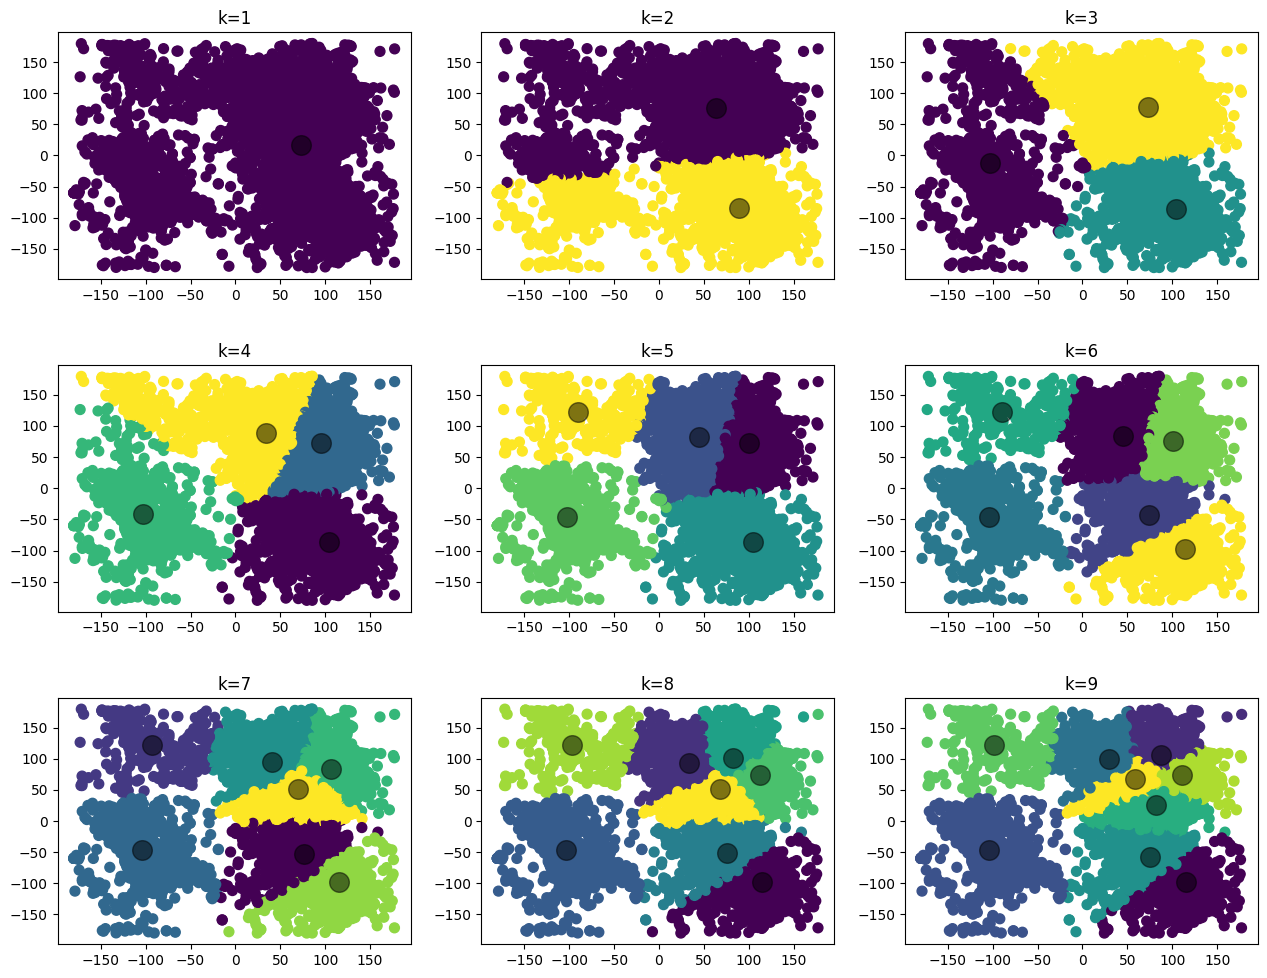

In [211]:
# Now, experiment with k...
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(PROTEIN_X)
  y_kmeans = kmeans.predict(PROTEIN_X)

  # Plot it
  plt.subplot(3,3,k) # 3 rows, 3 columns and different k
  plt.scatter(PROTEIN_X['phi_shifted_deg'], PROTEIN_X['psi_shifted_deg'], c=y_kmeans, s=50)
  # Add centers
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
  # Set margins etc.
  plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.35)


  plt.title("k={}".format(k)) 



So for 3, (and also for 3) we get a really low SSD, which is good since this indicates that we have a compact (dense) clusters.

Lets try with silhouette even if that takes ages to calculate...


**Question 2b.** 

Do the clusters found in part (a) seem reasonable?


**Approach 2b.**

We will test with an elbow graph and siluette 



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

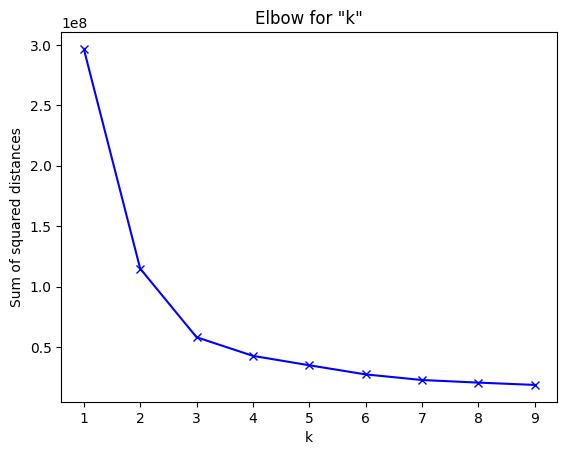

In [212]:
# Let's go for the elbow graph. Will it show us that 3 is the magical number?


Sum_of_squared_distances = []

K = range(1,10)
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans = kmeans.fit(PROTEIN_X)
  y_kmeans = kmeans.predict(PROTEIN_X)
  Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow for "k"')
plt.show()



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


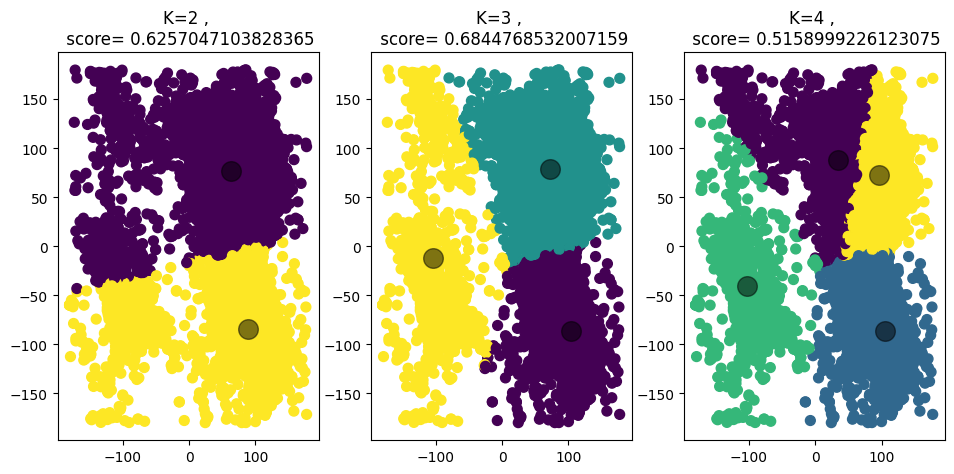

In [213]:
# Get the silhouette
from sklearn.metrics import silhouette_score


# Now, experiment with k...
for k in range(2, 5):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(PROTEIN_X)
  y_kmeans = kmeans.predict(PROTEIN_X)

  # Plot it
  plt.subplot(2,4,k) # 3 columns, 1 rows and different k
  plt.scatter(PROTEIN_X['phi_shifted_deg'], PROTEIN_X['psi_shifted_deg'], c=y_kmeans, s=50)
  # Add centers
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
  # Set margins etc.
  plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.35)

  
# Get the silhoutte printed
  plt.title(f"K={k} , \n score= {silhouette_score(PROTEIN_X, kmeans.labels_)}")


**Answer 2b** 

So we started by looking at the scatterplot and we thought we could see 5 clusters, so we tried placing 5 centers in the plot. They did not end up exactly where we thought, so we continued to experiment with k= 1 to 9.

1-2 was not very interesting. 
3 was rather good.

4-5 showed broken areas clustered together.

6 is pretty godd, but the top-left area is strangely broken.

7-9 looks very much the same


The elbow graph pointed at 3.

We see that 3 indeed has the highest silhouette-score, so we have validated our clusters



So, finally we suggest that **k = 3** is a good value.




# **3** 

Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.

**Question 3a.** Motivate the choice of:

1.   the minimum number of samples in the neighbourhood for a point to
be considered as a core point, and
2.   the maximum distance between two samples belonging to the same
neighbourhood (“eps” or “epsilon”).



**Answer 3a:1 and 2**


The maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”) was really hard to determine. We tried several times and considered doing some kind of loop through values to see what was best, but evenentually we got some clusters and settled for 0.15.

The minimum number of samples in the neighbourhood for a point to be considered as a core point was also tricky, but given that we knew that we had many datapoints, we figured that we needed "many" (more that 10) but not more than that we could seperate the clusters. We went for 90.

See below for scatter-plot.

**Answer 3b**

Create a scatter plot

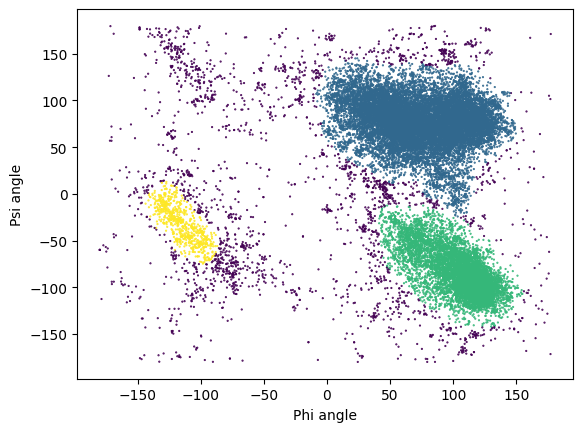

In [214]:
# Need DBSCAN and StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

shifted_data = np.column_stack((phi_shifted_deg, psi_shifted_deg))

# Standardize the data
scaler = StandardScaler()
PROTEIN_scaled = scaler.fit_transform(shifted_data)

# Choose the DBSCAN parameters
epsilon = 0.15
minPts = 90

# Fit the DBSCAN model
PROTEIN_dbscaned = DBSCAN(eps=epsilon, min_samples=minPts)
clusters = PROTEIN_dbscaned.fit_predict(PROTEIN_scaled)

# Visualize the clusters
plt.scatter(phi_shifted_deg, psi_shifted_deg, c=clusters, s=0.3, cmap='viridis')
plt.xlabel('Phi angle')
plt.ylabel('Psi angle')

plt.show()

**3c.** How many outliers are found? Plot a bar chart to show how often each of the
different amino acid residue types are outliers.

---



Clusters: 3
Outliers: 2339


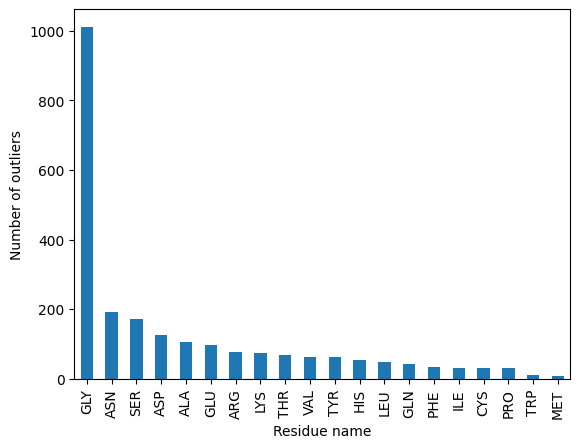

In [215]:
# Mask out 
core_samples_mask = np.zeros_like(PROTEIN_dbscaned.labels_, dtype=bool)
core_samples_mask[PROTEIN_dbscaned.core_sample_indices_] = True
labels = PROTEIN_dbscaned.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = list(labels).count(-1)
print('Clusters: %d' % n_clusters)
print('Outliers: %d' % n_outliers)

# Create a dataframe with labels and names.
PROTEIN_labels_name = pd.DataFrame({'labels': labels, 'name': PROTEIN['residue name']})
outlier_counts = PROTEIN_labels_name[PROTEIN_labels_name['labels'] == -1]['name'].value_counts()
outlier_counts.plot(kind='bar')
plt.xlabel('Residue name')
plt.ylabel('Number of outliers')
plt.show()


In [216]:
# Code 3c

**3d.** Compare the clusters found by DBSCAN with those found using K-means.
What are the pros and cons comparing DBSCAN and K-means for clustering?

The clusters found have similarities, but for DBSCAN we see that the clusters are more grouped and are surounded by outliers. 

**Pros K-means**

Fairly easy to get the clusters.


**Cons K-means**

No outliers are shown


**Pros DBSCAN**

With DBSCAN we also get outliers.

No need to suggest how many clusters we need.

Our clusters are not perfectly sperical, so DBSCAN works better.


**Cons DBSCAN**

DBSCAN requred a lot more work to try to figure out the epsilon and minPts


# **4**  

The data file can be stratified by amino acid residue type. Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid
residues of type PRO differ from the general clusters (i.e., the clusters that you get
from DBSCAN with mixed residue types in question 3). 

- What do you observe? 

- Can you draw any conclusion with respect to question 3d? 


**Note: **The parameters might
have to be adjusted from those used in question 3.

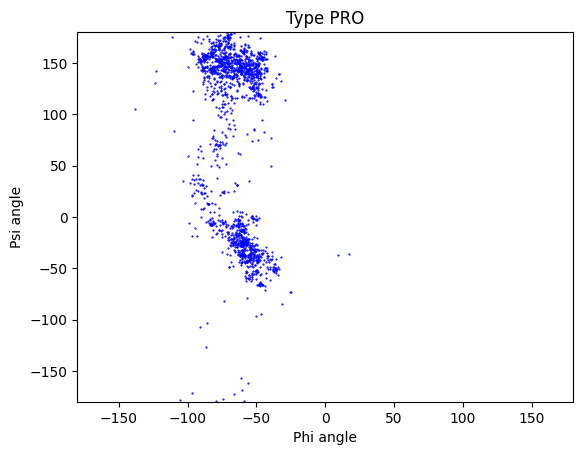

In [217]:
# Let's do a cluster again. But filter out
PROTEIN_filtered = PROTEIN[PROTEIN['residue name'] == 'PRO' ]

phi_shifted_deg = PROTEIN_filtered['phi'].values
psi_shifted_deg = PROTEIN_filtered['psi'].values
shifted_data = np.column_stack((phi_shifted_deg, psi_shifted_deg))
scaler = StandardScaler()
PROTEIN_scaled = scaler.fit_transform(shifted_data)

# New values
epsilon = 10
minPts = 100
PROTEIN_dbscaned = DBSCAN(eps=epsilon, min_samples=minPts)
clusters = PROTEIN_dbscaned.fit_predict(PROTEIN_scaled)

plt.scatter(phi_shifted_deg[clusters!=-1], psi_shifted_deg[clusters!=-1], s=0.3, c='blue')
plt.xlabel('Phi angle')
plt.ylabel('Psi angle')
plt.title('Type PRO')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.show()

Observe

**Conclusion**

We can observe that we had to change the parameters. One reason for this was that we have fewer datapoiints. 10/100 works fine.

The majority of PRO can be found around 60 degrees Phi angle. This corresponds with the full dataset and clusters.